# Bibliotecas

In [1]:
# Importação das bibliotecas de manipulação e gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Importação dos Modelos
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Importação das métricas
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import cross_val_score
import shap

warnings.filterwarnings("ignore")

# Carregamento dos Dados

In [2]:
# Importando o dataset
df = pd.read_csv('C:/Users/bruno/OneDrive/Desktop/AnalisePreditivaUTI/data/dataUTI_tratado.csv', sep=';', encoding='utf-8')

In [3]:
# Exibir amostra do dataset
df.head()

,ID Registro,Idade,Data de Internação CTI,IMC,Linha de Cuidado,HIV,Tuberculose,AIDS,Frequência Cardíaca,Frequência Respiratória,Creatinina,Leucócitos,pH,Contagem de Plaquetas,Score Respiratório,Bilirrubina,Desfecho UTI,Saída UTI,Tempo na UTI
0,3,45.0,2023-03-29,26.64,DFA,Unchecked,Unchecked,Unchecked,113,27,4.9,28.2,7.33,17.0,3.0,6.80,Transferência inter-hospitalar para outra Enfe...,2023-04-13,15.0
1,5,45.0,2023-04-05,20.76,Tuberculose,Unchecked,Checked,Unchecked,114,16,0.9,14.2,7.40,352.0,1.0,0.40,Óbito na UTI,2023-04-05,0.0
2,8,45.0,2023-04-10,19.81,HIV Resp.,Checked,Unchecked,Checked,177,35,0.6,14.4,7.18,413.0,3.0,0.50,Óbito na UTI,2023-04-11,1.0
3,9,45.0,2023-03-19,28.96,SRAG,Unchecked,Unchecked,Unchecked,40,20,3.8,15.0,7.18,190.0,0.0,0.08,Óbito na UTI,2023-04-11,23.0
4,10,45.0,2023-04-08,20.70,Tuberculose,Unchecked,Checked,Unchecked,143,34,1.5,12.1,7.09,361.0,3.0,0.10,Óbito na UTI,2023-04-09,1.0


In [4]:
# Análise de linhas e colunas
df.shape

(361, 19)

In [5]:
# Análise descritiva do dataset
df.describe()

,ID Registro,Idade,IMC,Frequência Cardíaca,Frequência Respiratória,Creatinina,Leucócitos,pH,Contagem de Plaquetas,Score Respiratório,Bilirrubina,Tempo na UTI
count,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000,361.000000
mean,221.603878,46.091413,20.472188,104.659280,25.487535,1.693795,10.562188,7.366648,228.161773,1.069252,1.089557,13.343490
std,133.282807,16.714430,5.994071,30.132167,6.880769,1.792332,6.750426,0.119968,148.110802,1.205622,3.196038,16.139445
min,3.000000,0.000000,9.130000,37.000000,7.000000,0.200000,0.300000,6.900000,2.000000,0.000000,0.030000,0.000000
25%,106.000000,33.000000,16.650000,85.000000,20.000000,0.770000,5.500000,7.330000,117.000000,0.000000,0.200000,4.000000
50%,202.000000,45.000000,19.720000,110.000000,25.000000,1.000000,9.500000,7.400000,200.000000,1.000000,0.400000,8.000000
75%,350.000000,58.000000,23.680000,127.000000,30.000000,1.710000,14.000000,7.430000,326.000000,2.000000,0.750000,17.000000
max,454.000000,92.000000,62.500000,177.000000,47.000000,12.000000,41.900000,7.930000,769.000000,4.000000,45.000000,131.000000


# Transformação de Variáveis

In [6]:
# Criação de uma cópia para transformação
df2 = df.copy()

In [7]:
# Transformação das variáveis categóricas:
df2['Linha de Cuidado'].replace({'DFA': 0, 'Chagas ICC': 1, 'HIV (outros)': 2, 'HIV Neuro': 3, 'HIV Resp.': 4, 'HTLV': 5, 'Monkeypox': 6, 'SRAG': 7, 'Tuberculose': 8, 'Outros': 9}, inplace=True)
df2['HIV'].replace({'Unchecked': 0, 'Checked': 1}, inplace=True)
df2['Tuberculose'].replace({'Unchecked': 0, 'Checked': 1}, inplace=True)
df2['AIDS'].replace({'Unchecked': 0, 'Checked': 1}, inplace=True)
df2['Desfecho UTI'] = np.where(df2['Desfecho UTI'] == 'Óbito na UTI', 0, 1)

Linha de Cuidado = DFA (0), Chagas ICC (1), HIV (outros) (2), HIV Neuro (3), HIV Resp. (4), HTLV (5), Monkeypox (6), SRAG (7), Tuberculose (8), Outros (9)

HIV = Unchecked (0), Checked (1)

Tuberculose = Unchecked (0), Checked (1)

AIDS = Unchecked (0), Checked (1)

Desfecho UTI = Óbito na UTI (0), Outros (1)

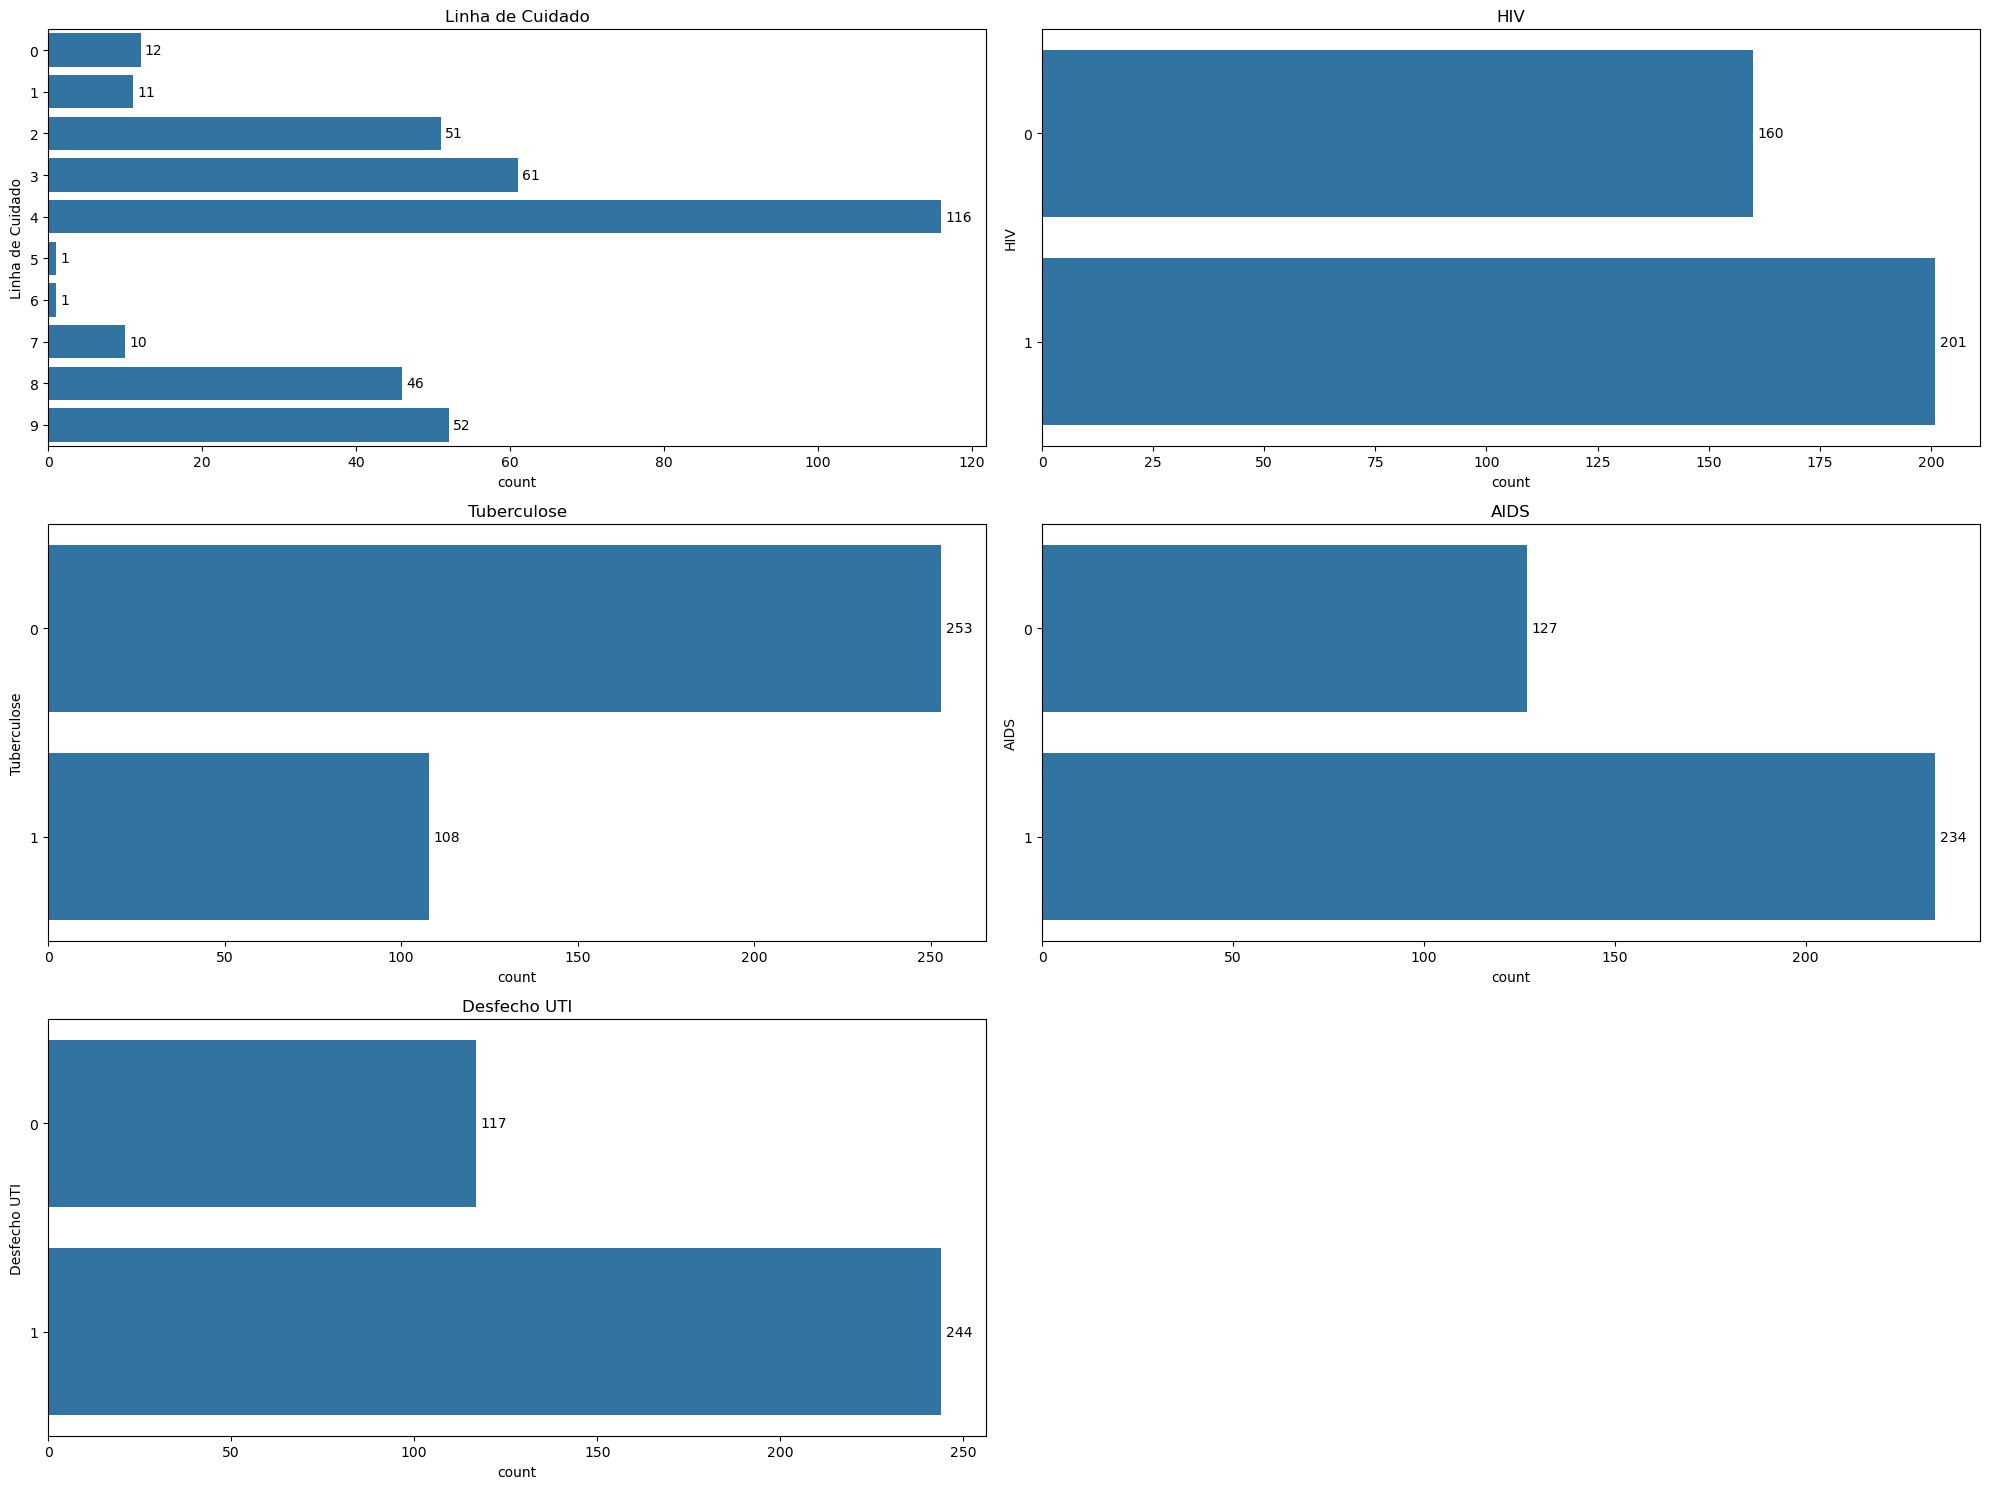

In [8]:
# Grid de variáveis transformadas
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

sns.countplot(ax=axes[0, 0], y='Linha de Cuidado', data=df2)
axes[0, 0].set_title('Linha de Cuidado')
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[0, 1], y='HIV', data=df2)
axes[0, 1].set_title('HIV')
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[1, 0], y='Tuberculose', data=df2)
axes[1, 0].set_title('Tuberculose')
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[1, 1], y='AIDS', data=df2)
axes[1, 1].set_title('AIDS')
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, label_type='edge', fontsize=10, padding=3)

sns.countplot(ax=axes[2, 0], y='Desfecho UTI', data=df2)
axes[2, 0].set_title('Desfecho UTI')
for container in axes[2, 0].containers:
    axes[2, 0].bar_label(container, label_type='edge', fontsize=10, padding=3)

# Remover o eixo vazio
axes[2, 1].axis('off')

plt.tight_layout()
plt.show()

In [9]:
# Análise dos tipos de variáveis
df2.dtypes

ID Registro                  int64
Idade                      float64
Data de Internação CTI      object
IMC                        float64
Linha de Cuidado             int64
HIV                          int64
Tuberculose                  int64
AIDS                         int64
Frequência Cardíaca          int64
Frequência Respiratória      int64
Creatinina                 float64
Leucócitos                 float64
pH                         float64
Contagem de Plaquetas      float64
Score Respiratório         float64
Bilirrubina                float64
Desfecho UTI                 int32
Saída UTI                   object
Tempo na UTI               float64
dtype: object

# Atributos Previsores e Alvo

In [10]:
# Seleção dos atributos (features) e da variável alvo (target)
features = ["Idade", "IMC", "Linha de Cuidado", "HIV", "Tuberculose", "AIDS", "Frequência Cardíaca", "Frequência Respiratória", "Creatinina", "Leucócitos", "pH", "Contagem de Plaquetas", "Score Respiratório", "Bilirrubina"]
x = df2[features]
y = df2["Desfecho UTI"]

In [11]:
# Divisão dos dados em treino e teste
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

# Escalonamento e OneHotEncoder

In [12]:
# Definindo as colunas numéricas e categóricas
num_features = ["Idade", "IMC", "Frequência Cardíaca", "Frequência Respiratória", "Creatinina", "Leucócitos", "pH", "Contagem de Plaquetas", "Score Respiratório", "Bilirrubina"]
cat_features = ["Linha de Cuidado", "HIV", "Tuberculose", "AIDS"]

In [13]:
print(df2[num_features + cat_features].dtypes)

Idade                      float64
IMC                        float64
Frequência Cardíaca          int64
Frequência Respiratória      int64
Creatinina                 float64
Leucócitos                 float64
pH                         float64
Contagem de Plaquetas      float64
Score Respiratório         float64
Bilirrubina                float64
Linha de Cuidado             int64
HIV                          int64
Tuberculose                  int64
AIDS                         int64
dtype: object


In [14]:
# Criação do pré-processador com ColumnTransformer:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(drop='first'), cat_features)
    ]
)

# Treinamento e Seleção do Modelo

In [15]:
# Pré-processamento (transformações definidas acima)
# SMOTE para balanceamento das classes
# Classificador (a ser definido via GridSearchCV)
pipe_smote = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=5)),
    ('classifier', CatBoostClassifier(random_state=5, verbose=0))
])

In [22]:
param_grid = [
    # Regressão Logística
    {
        'classifier': [LogisticRegression()],
        'classifier__C': [0.1, 1, 10, 100],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear', 'saga'],
        'classifier__max_iter': [100, 200, 500, 1000],
        'classifier__tol': [0.0001],
        'classifier__class_weight': ['balanced', None],
    },
    
    # XGBoost
    {
        'classifier': [XGBClassifier(eval_metric='logloss', random_state=5)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
    },
    
    # Naive Bayes
    {
        'classifier': [GaussianNB()],
    },

    # SVM
    {
        'classifier': [SVC(random_state=5, probability=True)],  # probability=True para permitir predict_proba
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__gamma': ['scale', 'auto'],
    },
    
    # KNN
    {
        'classifier': [KNeighborsClassifier()],
        'classifier__n_neighbors': [3, 5, 7],
        'classifier__weights': ['uniform', 'distance'],
    },

    # Árvore de Decisão
    {
        'classifier': [DecisionTreeClassifier(random_state=5)],
        'classifier__max_depth': [None, 3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
    },

    # Random Forest
    {
        'classifier': [RandomForestClassifier(random_state=5)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [None, 3, 5, 7],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4],
    },

    # Light GBM
    {
        'classifier': [LGBMClassifier(random_state=5)],
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
    },

    # CatBoost
    {
        'classifier': [CatBoostClassifier(random_state=5, verbose=0)],  # verbose=0 para silenciar logs
        'classifier__iterations': [100, 200],
        'classifier__depth': [3, 5, 7],
        'classifier__learning_rate': [0.01, 0.1, 0.2],
    }
]

warnings.filterwarnings("ignore")

grid = GridSearchCV(pipe_smote, param_grid, cv=5, n_jobs=-1, scoring=['accuracy', 'f1', 'roc_auc'], refit='roc_auc')
grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Idade',
                                                                          'IMC',
                                                                          'Frequência '
                                                                          'Cardíaca',
                                                                          'Frequência '
                                                                          'Respiratória',
                                                                          'Creatinina',
                                                                          'Leucócitos',
                                                                          'pH',
                                                                          'Contagem '
                                                                          'de '
                                                                          'Plaquetas',
                                                                          'Score '
                                                                          'Respiratório',
                                                                          'Bilirrubina']),
                                                                        ('cat',
                                                                         OneHotEncoder(drop='first'),
                                                                         ['Linha '
                                                                          'de '
                                                                          'Cuidado',
                                                                          'HIV',
                                                                          'Tuberculos...
                          'classifier__learning_rate': [0.01, 0.1, 0.2],
                          'classifier__max_depth': [3, 5, 7],
                          'classifier__n_estimators': [100, 200]},
                         {'classifier': [<catboost.core.CatBoostClassifier object at 0x0000019A34422F30>],
                          'classifier__depth': [3, 5, 7],
                          'classifier__iterations': [100, 200],
                          'classifier__learning_rate': [0.01, 0.1, 0.2]}],
             refit='roc_auc', scoring=['accuracy', 'f1', 'roc_auc'])

In [17]:
# Exibindo o melhor modelo encontrado e seus parâmetros
melhor_modelo = grid.best_estimator_
print("Melhor modelo:", melhor_modelo.get_params()['classifier'])

Melhor modelo: LogisticRegression(C=0.1, class_weight='balanced', penalty='l1',
                   solver='liblinear')


# Avaliação do Modelo

In [18]:
# Previsões nos dados de teste
y_pred = melhor_modelo.predict(x_test)
print("Relatório de Classificação:\n", classification_report(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.58      0.69      0.63        26
           1       0.81      0.72      0.76        47

    accuracy                           0.71        73
   macro avg       0.70      0.71      0.70        73
weighted avg       0.73      0.71      0.72        73



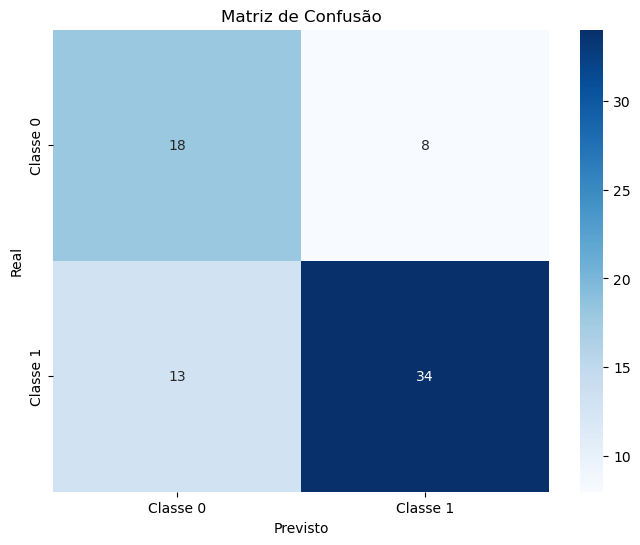

In [19]:
# Matriz de Confusão
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Classe 0', 'Classe 1'],
            yticklabels=['Classe 0', 'Classe 1'])
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

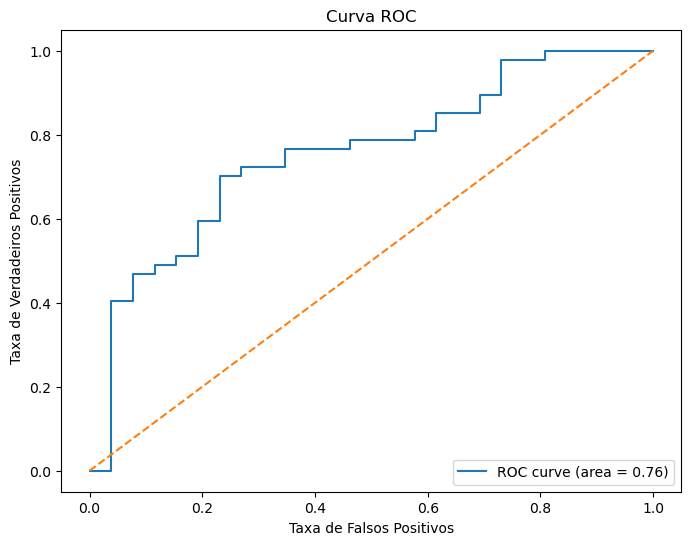

In [20]:
# Curva ROC
y_pred_proba = melhor_modelo.predict_proba(x_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

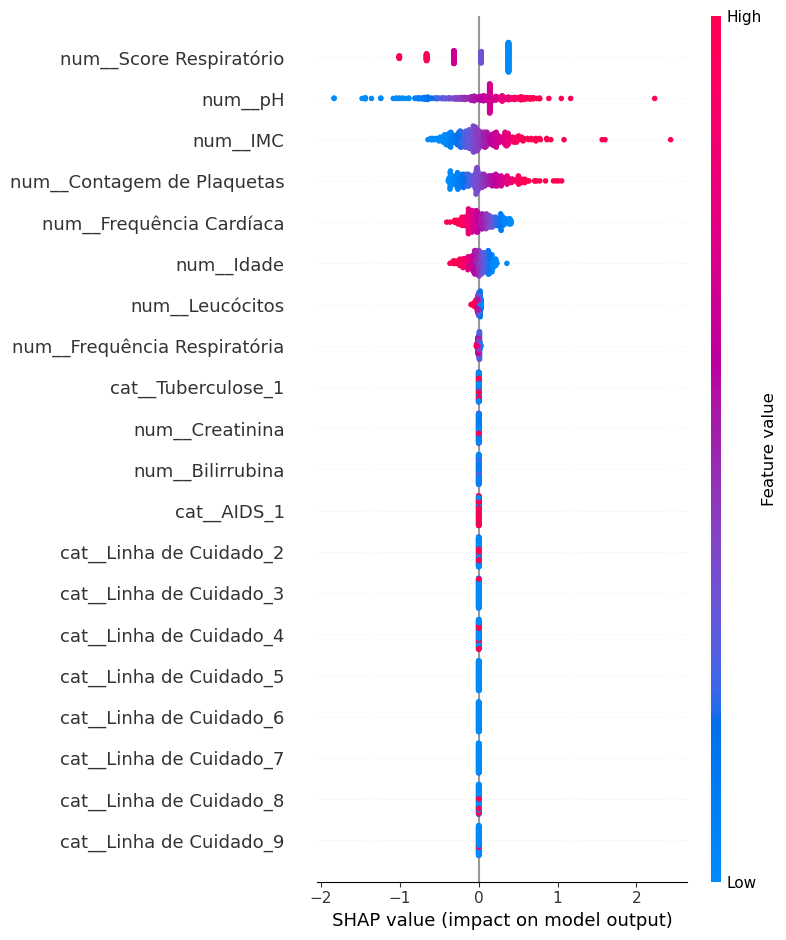

In [21]:
# Transformando os dados completos com o pré-processador (para obter a versão final das features)
x_transformed = melhor_modelo.named_steps['preprocessor'].transform(x)

# Criando o explainer com o classificador treinado
explainer = shap.Explainer(melhor_modelo.named_steps['classifier'], x_transformed)
shap_values = explainer(x_transformed)

# Obtendo os nomes das features após transformação
feature_names = melhor_modelo.named_steps['preprocessor'].get_feature_names_out()

# Plotando o summary plot do SHAP
shap.summary_plot(shap_values, x_transformed, feature_names=feature_names)